In [1]:
import subprocess
cmd="ls -l"
sp = subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
# rt=sp.wait()
out,err=sp.communicate()
print(out)

b'total 5376\ndrwxrwxr-x 2 ubuntu ubuntu    4096 Jun  5 05:52 data\n-rw-rw-r-- 1 ubuntu ubuntu     714 May 28 07:51 eachRequest.ipynb\n-rw-rw-r-- 1 ubuntu ubuntu   51587 Jun 30 13:26 jagerAll_Metrics.ipynb\n-rw-rw-r-- 1 ubuntu ubuntu   76547 Jul  1 09:07 jagerMetrics.ipynb\n-rw-rw-r-- 1 ubuntu ubuntu 4820716 Jun 30 13:17 k8s_composePost.csv\n-rw-rw-r-- 1 ubuntu ubuntu  270627 Jul  8 13:41 k8s_default.ipynb\n-rw-rw-r-- 1 ubuntu ubuntu    1205 May 28 06:52 output1_1m.log\n-rw-rw-r-- 1 ubuntu ubuntu  145782 May 28 09:51 output2_3m.log\n-rw-rw-r-- 1 ubuntu ubuntu   41725 May 29 13:03 output3_30s.log\n-rw-rw-r-- 1 ubuntu ubuntu   41715 May 29 02:09 outputtt.log\n-rw-rw-r-- 1 ubuntu ubuntu    5588 May 29 12:50 wrk_requests_v2.py\n-rw-rw-r-- 1 ubuntu ubuntu   11119 May 20 11:03 wrk_response_time_analysis.py\n'


In [2]:
import subprocess
cmd="ls -l"
sp = subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE,stderr=subprocess.PIPE,universal_newlines=True)
# rt=sp.wait()
out,err=sp.communicate()
print(out)

total 5376
drwxrwxr-x 2 ubuntu ubuntu    4096 Jun  5 05:52 data
-rw-rw-r-- 1 ubuntu ubuntu     714 May 28 07:51 eachRequest.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   51587 Jun 30 13:26 jagerAll_Metrics.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   76547 Jul  1 09:07 jagerMetrics.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 4820716 Jun 30 13:17 k8s_composePost.csv
-rw-rw-r-- 1 ubuntu ubuntu  270627 Jul  8 13:41 k8s_default.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    1205 May 28 06:52 output1_1m.log
-rw-rw-r-- 1 ubuntu ubuntu  145782 May 28 09:51 output2_3m.log
-rw-rw-r-- 1 ubuntu ubuntu   41725 May 29 13:03 output3_30s.log
-rw-rw-r-- 1 ubuntu ubuntu   41715 May 29 02:09 outputtt.log
-rw-rw-r-- 1 ubuntu ubuntu    5588 May 29 12:50 wrk_requests_v2.py
-rw-rw-r-- 1 ubuntu ubuntu   11119 May 20 11:03 wrk_response_time_analysis.py



In [3]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from datetime import datetime, timedelta
from kubernetes import client, config

# Connect to Prometheus
# Kubernetes Config
config.load_kube_config()
v1 = client.CoreV1Api()

# Prometheus Config
#prom_url = "http://<PROMETHEUS_SERVER_IP>:<PORT>"
# prom_url = "http://10.110.188.57:9090"
prom_url = "http://10.105.116.175:9090"

prom = PrometheusConnect(url=prom_url, disable_ssl=True)
#test prom connection
prom_connect_response = prom.custom_query(query="up")
print(prom_connect_response)


# Define the namespace and time range
namespace = 'social-network'
time_range = timedelta(minutes=160)
end_time = datetime.now()
start_time = end_time - time_range

# Define Prometheus queries for response time and throughput
response_time_query = f"rate(istio_request_duration_milliseconds_sum{{namespace='{namespace}'}}[{int(time_range.total_seconds())}s]) / rate(istio_requests_total{{namespace='{namespace}'}}[{int(time_range.total_seconds())}s])"
throughput_query = f"rate(istio_requests_total{{namespace='{namespace}'}}[{int(time_range.total_seconds())}s])"

# Fetch metrics data
response_time_data = prom.custom_query_range(
    query=response_time_query,
    start_time=start_time,
    end_time=end_time,
    step='10s' # Query resolution step width in duration
)
throughput_data = prom.custom_query_range(
    query=throughput_query,
    start_time=start_time,
    end_time=end_time,
    step='10s'
)


# Convert to DataFrame for easy manipulation
response_time_df = MetricRangeDataFrame(response_time_data)
throughput_df = MetricRangeDataFrame(throughput_data)

# Calculate average response time and throughput
average_response_time = response_time_df['value'].mean()
average_throughput = throughput_df['value'].mean()

# Print the results
print(f"Average Response Time over last 10 minutes: {average_response_time} ms")
print(f"Average Throughput over last 10 minutes: {average_throughput} requests/second")

[{'metric': {'__name__': 'up', 'app': 'compose-post-service', 'instance': '192.168.140.61:15020', 'job': 'kubernetes-pods', 'namespace': 'social-network3', 'pod': 'compose-post-service-6d8fcf9f6-xv2cx', 'pod_template_hash': '6d8fcf9f6', 'security_istio_io_tlsMode': 'istio', 'service': 'compose-post-service', 'service_istio_io_canonical_name': 'compose-post-service', 'service_istio_io_canonical_revision': 'latest'}, 'value': [1720494057.154, '1']}, {'metric': {'__name__': 'up', 'app': 'compose-post-service', 'instance': '192.168.18.225:15020', 'job': 'kubernetes-pods', 'namespace': 'social-network', 'pod': 'compose-post-service-67c6575bfc-cdqws', 'pod_template_hash': '67c6575bfc', 'security_istio_io_tlsMode': 'istio', 'service': 'compose-post-service', 'service_istio_io_canonical_name': 'compose-post-service', 'service_istio_io_canonical_revision': 'latest'}, 'value': [1720494057.154, '1']}, {'metric': {'__name__': 'up', 'app': 'compose-post-service', 'instance': '192.168.18.241:15020',

In [4]:
response_time_df['value'].mean()

508.97741820435976

In [6]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from datetime import datetime, timedelta
from kubernetes import client, config
import re
import pandas as pd

def get_metrics_data(lookback_min= 0, time_range="10m", rate_parameter="1m", query_step="10s"):
    # Connect to Prometheus
    config.load_kube_config()
    v1 = client.CoreV1Api()

    # Prometheus Config
    prom_url = "http://10.105.116.175:9090"
    prom = PrometheusConnect(url=prom_url, disable_ssl=True)

    # Test Prometheus connection
    prom_connect_response = prom.custom_query(query="up")
    if not prom_connect_response:
        raise Exception("Failed to connect to Prometheus")

    # Define the namespace
    namespace = 'social-network'

    # Parse time_range to get timedelta
    time_value, time_unit = int(re.match(r"(\d+)", time_range).group(0)), re.match(r"(\d+)(\D+)", time_range).group(2)
    time_delta_map = {'s': 'seconds', 'm': 'minutes', 'h': 'hours', 'd': 'days'}
    time_kwargs = {time_delta_map[time_unit]: time_value}
    time_range_delta = timedelta(**time_kwargs)

    end_time = datetime.now() -timedelta(minutes=lookback_min)
    start_time = end_time - time_range_delta

    # Define Prometheus queries for response time and throughput
    response_time_query = f"rate(istio_request_duration_milliseconds_sum{{namespace='{namespace}',response_code='200'}}[{rate_parameter}]) / rate(istio_requests_total{{namespace='{namespace}',response_code='200'}}[{rate_parameter}])"
    throughput_query = f"rate(istio_requests_total{{namespace='{namespace}',response_code='200'}}[{rate_parameter}])"

    # Fetch metrics data
    response_time_data = prom.custom_query_range(
        query=response_time_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )
    throughput_data = prom.custom_query_range(
        query=throughput_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )

    # Convert to DataFrame for easy manipulation
    response_time_df = MetricRangeDataFrame(response_time_data)
    throughput_df = MetricRangeDataFrame(throughput_data)

    # Remove NaN values
    response_time_df = response_time_df.dropna()
    throughput_df = throughput_df.dropna()
    
    # Remove '0' values 
    # for throughput (it will be inaccurate to counts all values with '0' when calculating average)
    throughput_df = throughput_df[throughput_df['value'] !=0]
    response_time_df = response_time_df[response_time_df['value'] !=0]

    
    

    # Ensure the index is unique
    # response_time_df = response_time_df[~response_time_df.index.duplicated(keep='first')]
    # throughput_df = throughput_df[~throughput_df.index.duplicated(keep='last')]

    # # Detect gaps and insert NaNs
    # response_time_df = response_time_df.asfreq(query_step).fillna(value=pd.NA)
    # throughput_df = throughput_df.asfreq(query_step).fillna(value=pd.NA)

    # Calculate average response time and throughput
    average_response_time = response_time_df['value'].mean()
    average_throughput = throughput_df['value'].mean()

    return response_time_df, throughput_df, average_response_time, average_throughput


In [7]:
'''Workload Sending
three different Requests of social network; QPS, Users
'''
import subprocess
from tqdm import tqdm
# compos-post request
url_1 = "http://nginx-thrift.social-network.svc.cluster.local:8080/wrk2-api/post/compose"
script_path_1 = "/home/ubuntu/DeathStarBench/socialNetwork/wrk2/scripts/social-network/compose-post.lua"  


# read-home-timeline request
url_2 = "http://nginx-thrift.social-network.svc.cluster.local:8080/wrk2-api/home-timeline/read"
script_path_2 = "/home/ubuntu/DeathStarBench/socialNetwork/wrk2/scripts/social-network/read-home-timeline.lua"

# read-user-timeline request
url_3 = "http://nginx-thrift.social-network.svc.cluster.local:8080/wrk2-api/user-timeline/read"
script_path_3 = "/home/ubuntu/DeathStarBench/socialNetwork/wrk2/scripts/social-network/read-user-timeline.lua"


url= [url_1, url_2, url_3]
script_path = [script_path_1, script_path_2, script_path_3]
req_rates = [[20, 100, 200], # compose-post rquest rate; bottleneck ~250 req/s
            [50,1000, 2000], # read-home-timeline request rate
            [50,1000, 2000] # read-user-timeline request rate
            ]
req_rates=[[10,20], [50,100], [60,120]]
duration = '2m'

# gnerating different workloads
# for i in range(len(url)):
#     for req in req_rates[i]: # using different rate for different requests
#         command = f"/home/ubuntu/DeathStarBench/wrk2/wrk -D -t2 -c100 -d{duration} -L -s {script_path[i]} {url[i]} -R{req}"
#         result = subprocess.run(command, shell=True)        
#         response_time_df, throughput_df, average_response_time, average_throughput = get_metrics_data(
#             lookback_min=0, time_range="2m", rate_parameter="2m", query_step="5s")
#         print(f"Current Req is: {req} reqs/second")
#         print(f"Average Response Time: {average_response_time} ms")
#         print(f"Average Throughput: {average_throughput} requests/second")        



In [9]:
command = f"/home/ubuntu/DeathStarBench/wrk2/wrk -D -t2 -c100 -d{duration} -L -s {script_path[0]} {url[0]} -R{1000}"
result = subprocess.run(command, shell=True )        

response_time_df, throughput_df, average_response_time, average_throughput = get_metrics_data(
lookback_min=0, time_range=duration , rate_parameter="1m", query_step="10s")


Running 2m test @ http://nginx-thrift.social-network.svc.cluster.local:8080/wrk2-api/post/compose
  2 threads and 100 connections

  Thread calibration: mean lat.: 4218.298ms, rate sampling interval: 14090ms
  Thread calibration: mean lat.: 3766.235ms, rate sampling interval: 12582ms

-----------------------------------------------------------------------
Test Results @ http://nginx-thrift.social-network.svc.cluster.local:8080/wrk2-api/post/compose 
  Thread Stats   Avg      Stdev     99%   +/- Stdev
    Latency     0.86m    24.19s    1.55m    57.15%
    Req/Sec   107.40     10.73   119.00     80.00%
  Latency Distribution (HdrHistogram - Recorded Latency)
 50.000%    0.85m 
 75.000%    1.23m 
 90.000%    1.43m 
 99.000%    1.55m 
 99.900%    1.57m 
 99.990%    1.57m 
 99.999%    1.58m 
100.000%    1.58m 

  Detailed Percentile spectrum:
       Value   Percentile   TotalCount 1/(1-Percentile)

    7192.575     0.000000            2         1.00
   18841.599     0.100000         2390   

In [18]:
throughput_df

,app,connection_security_policy,destination_app,destination_canonical_revision,destination_canonical_service,destination_cluster,destination_principal,destination_service,destination_service_name,destination_service_namespace,...,service_istio_io_canonical_revision,source_app,source_canonical_revision,source_canonical_service,source_cluster,source_principal,source_version,source_workload,source_workload_namespace,value
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-30 12:40:59,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,26.400000
2024-06-30 12:41:09,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,26.400000
2024-06-30 12:41:19,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,83.644444
2024-06-30 12:41:29,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,161.577778
2024-06-30 12:41:39,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,161.577778
2024-06-30 12:41:49,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,207.155556
2024-06-30 12:41:59,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,229.444444
2024-06-30 12:42:09,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,229.444444
2024-06-30 12:42:19,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,228.333333


In [10]:

throughput_df['value']

timestamp
2024-06-30 12:40:59     26.400000
2024-06-30 12:41:09     26.400000
2024-06-30 12:41:19     83.644444
2024-06-30 12:41:29    161.577778
2024-06-30 12:41:39    161.577778
2024-06-30 12:41:49    207.155556
2024-06-30 12:41:59    229.444444
2024-06-30 12:42:09    229.444444
2024-06-30 12:42:19    228.333333
2024-06-30 12:42:29    221.022222
2024-06-30 12:42:39    221.022222
2024-06-30 12:42:49    215.644444
Name: value, dtype: float64

In [11]:
response_time_df['value']

timestamp
2024-06-30 12:40:59    261.704545
2024-06-30 12:41:09    261.704545
2024-06-30 12:41:19    481.159671
2024-06-30 12:41:29    455.444231
2024-06-30 12:41:39    455.444231
2024-06-30 12:41:49    482.260245
2024-06-30 12:41:59    436.093462
2024-06-30 12:42:09    436.093462
2024-06-30 12:42:19    436.714842
2024-06-30 12:42:29    452.041524
2024-06-30 12:42:39    452.041524
2024-06-30 12:42:49    462.487119
Name: value, dtype: float64

In [12]:
average_response_time

422.7657834190633

In [13]:
import pandas
throughput_df = throughput_df[throughput_df['value'] !=0]
throughput_df ['value'].mean()

167.63888888888886

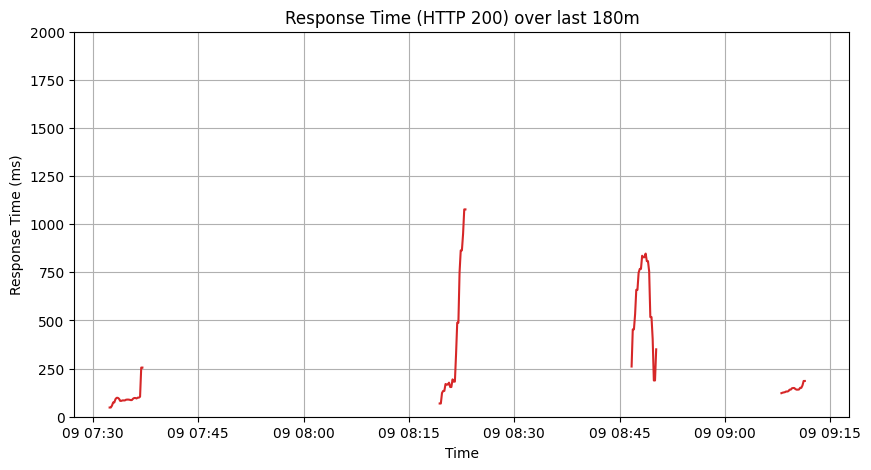

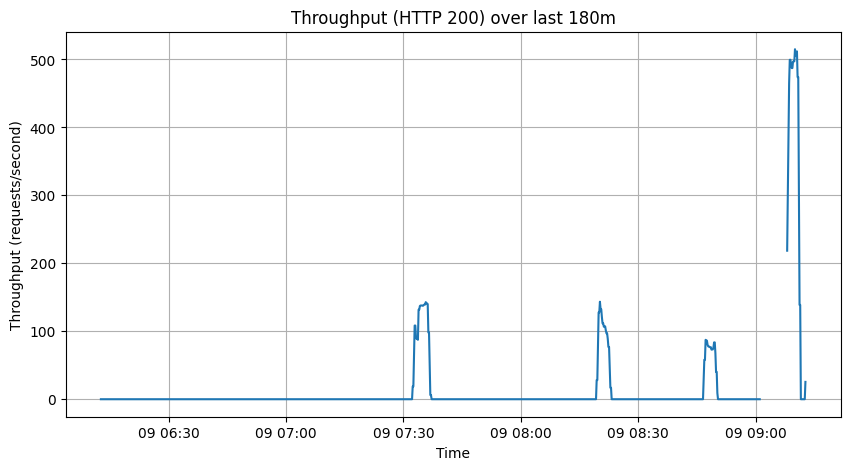

Average Response Time: inf ms
Average Throughput: 14.899677106837602 requests/second


In [21]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from datetime import datetime, timedelta
from kubernetes import client, config
import re
import matplotlib.pyplot as plt
import pandas as pd


def get_metrics_data(time_range="10m", rate_parameter="1m", query_step="10s"):
    # Connect to Prometheus
    config.load_kube_config()
    v1 = client.CoreV1Api()

    # Prometheus Config
    prom_url = "http://10.105.116.175:9090"
    prom = PrometheusConnect(url=prom_url, disable_ssl=True)

    # Test Prometheus connection
    prom_connect_response = prom.custom_query(query="up")
    if not prom_connect_response:
        raise Exception("Failed to connect to Prometheus")

    # Define the namespace
    namespace = 'social-network'

    # Parse time_range to get timedelta
    time_value, time_unit = int(re.match(r"(\d+)", time_range).group(0)), re.match(r"(\d+)(\D+)", time_range).group(2)
    time_delta_map = {'s': 'seconds', 'm': 'minutes', 'h': 'hours', 'd': 'days'}
    time_kwargs = {time_delta_map[time_unit]: time_value}
    time_range_delta = timedelta(**time_kwargs)

    end_time = datetime.now()
    start_time = end_time - time_range_delta

    # Define Prometheus queries for response time and throughput
    response_time_query = f"rate(istio_request_duration_milliseconds_sum{{namespace='{namespace}',response_code='200'}}[{rate_parameter}]) / rate(istio_requests_total{{namespace='{namespace}',response_code='200'}}[{rate_parameter}])"
    throughput_query = f"rate(istio_requests_total{{namespace='{namespace}',response_code='200'}}[{rate_parameter}])"
    '''if observe in Promtheus, use the following query for response time and throughput
    rate(istio_request_duration_milliseconds_sum{namespace='social-network'}[1m])/ rate(istio_requests_total{namespace='social-network'}[1m])
    rate(istio_requests_total{namespace='social-network'}[1m])
    '''

    # Fetch metrics data
    response_time_data = prom.custom_query_range(
        query=response_time_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )
    throughput_data = prom.custom_query_range(
        query=throughput_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )

    # Convert to DataFrame for easy manipulation
    response_time_df = MetricRangeDataFrame(response_time_data)
    throughput_df = MetricRangeDataFrame(throughput_data)

    # Remove NaN values
    response_time_df = response_time_df.dropna()
    throughput_df = throughput_df.dropna()
    
    # Ensure the index is unique
    response_time_df = response_time_df[~response_time_df.index.duplicated(keep='first')]
    throughput_df = throughput_df[~throughput_df.index.duplicated(keep='last')]
    

    # Detect gaps and insert NaNs
    response_time_df = response_time_df.asfreq(query_step).fillna(value=pd.NA)
    throughput_df = throughput_df.asfreq(query_step).fillna(value=pd.NA)

    # Calculate average response time and throughput
    average_response_time = response_time_df['value'].mean()
    average_throughput = throughput_df['value'].mean()

    return response_time_df, throughput_df, average_response_time, average_throughput

def plot_metrics(time_range="100m", rate_parameter="1m", query_step="10s"):
    response_time_df, throughput_df, average_response_time, average_throughput = get_metrics_data(time_range, rate_parameter, query_step)

    # Plot Response Time
    plt.figure(figsize=(10, 5))
    plt.plot(response_time_df.index, response_time_df['value'], color='tab:red')
    plt.xlabel('Time')
    plt.ylim([0,2000])
    plt.ylabel('Response Time (ms)')
    plt.title(f"Response Time (HTTP 200) over last {time_range}")
    plt.grid(True)
    plt.show()

    # Plot Throughput
    plt.figure(figsize=(10, 5))
    plt.plot(throughput_df.index, throughput_df['value'], color='tab:blue')
    plt.xlabel('Time')
    plt.ylabel('Throughput (requests/second)')
    
    plt.title(f"Throughput (HTTP 200) over last {time_range}")
    plt.grid(True)
    plt.show()

    print(f"Average Response Time: {average_response_time} ms")
    print(f"Average Throughput: {average_throughput} requests/second")

# Example usage
plot_metrics(time_range="180m", rate_parameter="1m", query_step="10s")



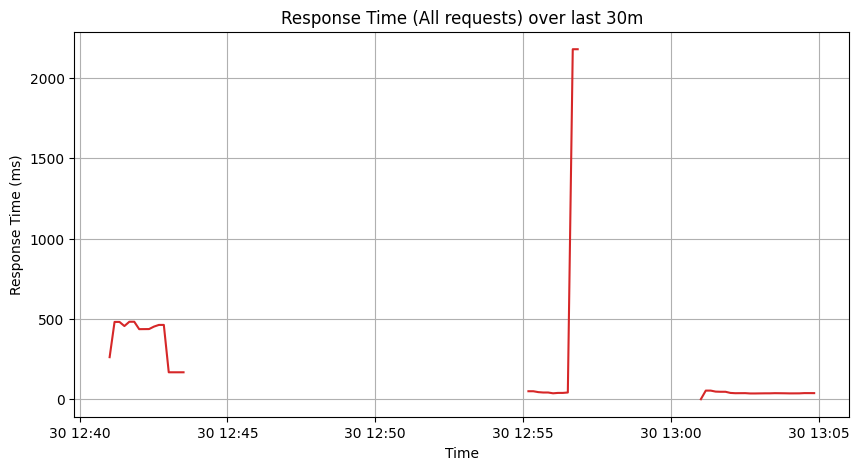

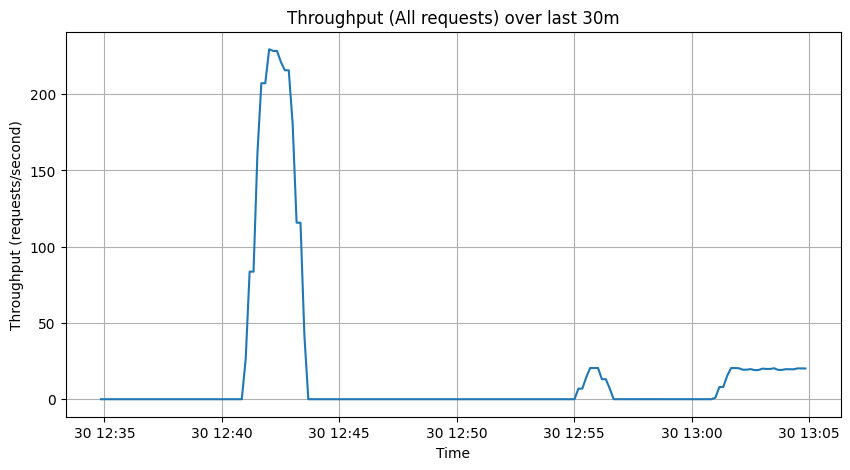

Average Response Time: 228.60743056668616 ms
Average Throughput: 17.195334561080415 requests/second


In [42]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from datetime import datetime, timedelta
from kubernetes import client, config
import re
import matplotlib.pyplot as plt
import pandas as pd


def get_metrics_data(time_range="10m", rate_parameter="1m", query_step="10s"):
    # Connect to Prometheus
    config.load_kube_config()
    v1 = client.CoreV1Api()

    # Prometheus Config
    prom_url = "http://10.105.116.175:9090"
    prom = PrometheusConnect(url=prom_url, disable_ssl=True)

    # Test Prometheus connection
    prom_connect_response = prom.custom_query(query="up")
    if not prom_connect_response:
        raise Exception("Failed to connect to Prometheus")

    # Define the namespace
    namespace = 'social-network'

    # Parse time_range to get timedelta
    time_value, time_unit = int(re.match(r"(\d+)", time_range).group(0)), re.match(r"(\d+)(\D+)", time_range).group(2)
    time_delta_map = {'s': 'seconds', 'm': 'minutes', 'h': 'hours', 'd': 'days'}
    time_kwargs = {time_delta_map[time_unit]: time_value}
    time_range_delta = timedelta(**time_kwargs)

    end_time = datetime.now()
    start_time = end_time - time_range_delta

    # Define Prometheus queries for response time and throughput
    response_time_query = f"rate(istio_request_duration_milliseconds_sum{{namespace='{namespace}'}}[{rate_parameter}]) / rate(istio_requests_total{{namespace='{namespace}'}}[{rate_parameter}])"
    throughput_query = f"rate(istio_requests_total{{namespace='{namespace}',response_code='200'}}[{rate_parameter}])"

    # Fetch metrics data
    response_time_data = prom.custom_query_range(
        query=response_time_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )
    throughput_data = prom.custom_query_range(
        query=throughput_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )

    # Convert to DataFrame for easy manipulation
    response_time_df = MetricRangeDataFrame(response_time_data)
    throughput_df = MetricRangeDataFrame(throughput_data)

    # Remove NaN values
    response_time_df = response_time_df.dropna()
    throughput_df = throughput_df.dropna()

    # Ensure the index is unique
    response_time_df = response_time_df[~response_time_df.index.duplicated(keep='first')]
    throughput_df = throughput_df[~throughput_df.index.duplicated(keep='last')]

    # Detect gaps and insert NaNs
    response_time_df = response_time_df.asfreq(query_step).fillna(value=pd.NA)
    throughput_df = throughput_df.asfreq(query_step).fillna(value=pd.NA)

    # Calculate average response time and throughput
    average_response_time = response_time_df['value'].mean()
    average_throughput = throughput_df['value'].mean()

    return response_time_df, throughput_df, average_response_time, average_throughput

def plot_metrics(time_range="100m", rate_parameter="1m", query_step="10s"):
    response_time_df, throughput_df, average_response_time, average_throughput = get_metrics_data(time_range, rate_parameter, query_step)

    # Plot Response Time
    plt.figure(figsize=(10, 5))
    plt.plot(response_time_df.index, response_time_df['value'], color='tab:red')
    plt.xlabel('Time')
    plt.ylabel('Response Time (ms)')
    plt.title(f"Response Time (All requests) over last {time_range}")
    plt.grid(True)
    plt.show()

    # Plot Throughput
    plt.figure(figsize=(10, 5))
    plt.plot(throughput_df.index, throughput_df['value'], color='tab:blue')
    plt.xlabel('Time')
    plt.ylabel('Throughput (requests/second)')
    plt.title(f"Throughput (All requests) over last {time_range}")
    plt.grid(True)
    plt.show()

    print(f"Average Response Time: {average_response_time} ms")
    print(f"Average Throughput: {average_throughput} requests/second")

# Example usage
plot_metrics(time_range="30m", rate_parameter="1m", query_step="10s")
